# HW2 Q1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio  
from skimage import color
from skimage.util import random_noise, img_as_ubyte
from scipy.ndimage import gaussian_filter, median_filter, maximum_filter, minimum_filter, generic_filter
from skimage.filters import rank
from sklearn.metrics import mean_squared_error
from statistics import harmonic_mean
import cv2

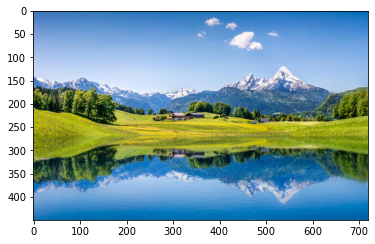

In [2]:
# Read and display image
img = imageio.imread('theAlps.jpg')
plt.imshow(img)

**a) Convert the image to grayscale**

(450, 720)


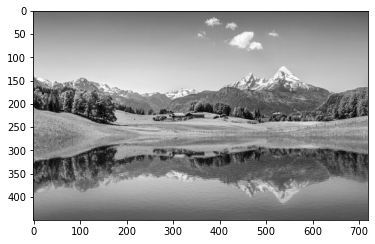

In [3]:
img_gray = color.rgb2gray(img)
print(img_gray.shape)
plt.imshow(img_gray,cmap='gray')

**b) Define two new images by adding noise to the gray scale image.**

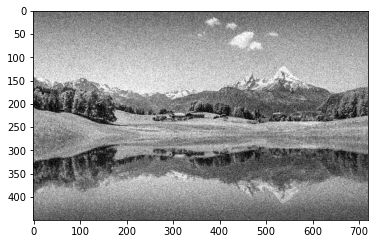

In [4]:
# J1 = zero mean gaussian white noise with variance of 0.01
mean = 0
var = 0.01
j1 = random_noise(img_gray, mode='gaussian', mean=mean, var=var)
plt.imshow(j1,cmap='gray')

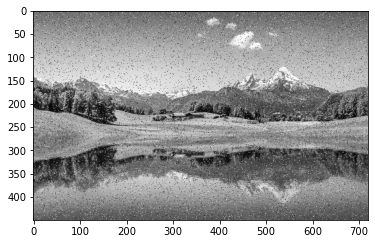

In [5]:
# J2 = Salt and pepper noise affecting 5% of the pixels.
pct_pxl = 0.05
j2 = random_noise(img_gray, mode='s&p', amount = pct_pxl)
plt.imshow(j2,cmap='gray')

**c) Apply the following denoising techniques to $𝑱_1$ and $𝑱_2$ and display the results. You can consider kernel size 3× 3.**

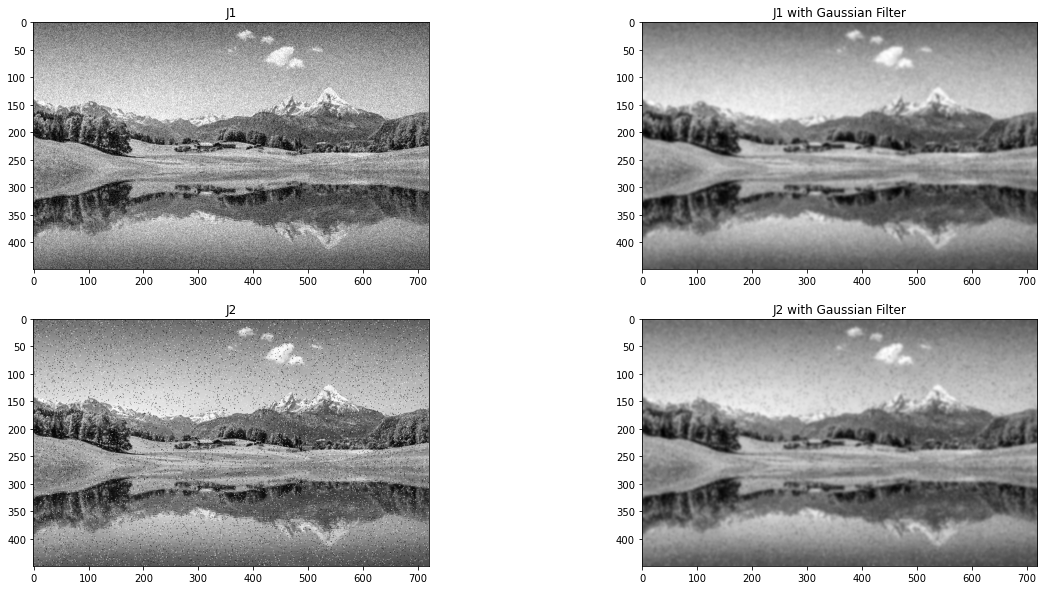

In [6]:
# Gaussian Filter
fig = plt.figure(figsize=(20,10), frameon=False)
ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223)  
ax4 = fig.add_subplot(224) 
j1_gauss = gaussian_filter(j1, sigma=2)
j2_gauss = gaussian_filter(j2, sigma=2)

ax1.imshow(j1,cmap='gray')
ax2.imshow(j1_gauss, cmap='gray')
ax3.imshow(j2,cmap='gray')
ax4.imshow(j2_gauss, cmap='gray')

ax1.title.set_text('J1')
ax2.title.set_text('J1 with Gaussian Filter')
ax3.title.set_text('J2')
ax4.title.set_text('J2 with Gaussian Filter')

plt.show()

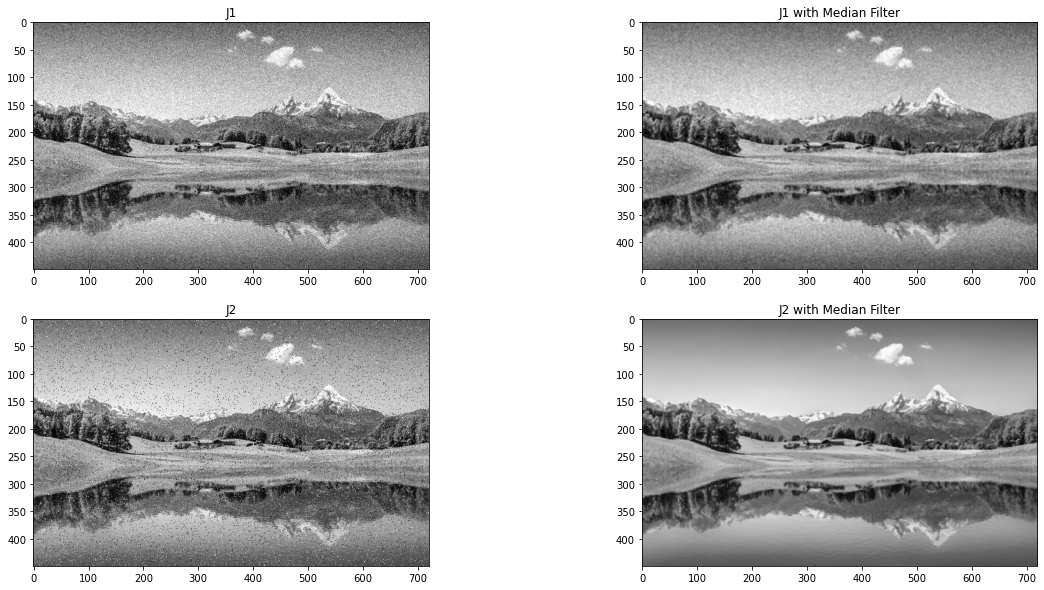

In [7]:
# Median filering
fig = plt.figure(figsize=(20,10), frameon=False)
ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223)  
ax4 = fig.add_subplot(224) 
j1_median = median_filter(j1, size=(3,3))
j2_median = median_filter(j2, size=(3,3))

ax1.imshow(j1,cmap='gray')
ax2.imshow(j1_median, cmap='gray')
ax3.imshow(j2,cmap='gray')
ax4.imshow(j2_median, cmap='gray')

ax1.title.set_text('J1')
ax2.title.set_text('J1 with Median Filter')
ax3.title.set_text('J2')
ax4.title.set_text('J2 with Median Filter')

plt.show()

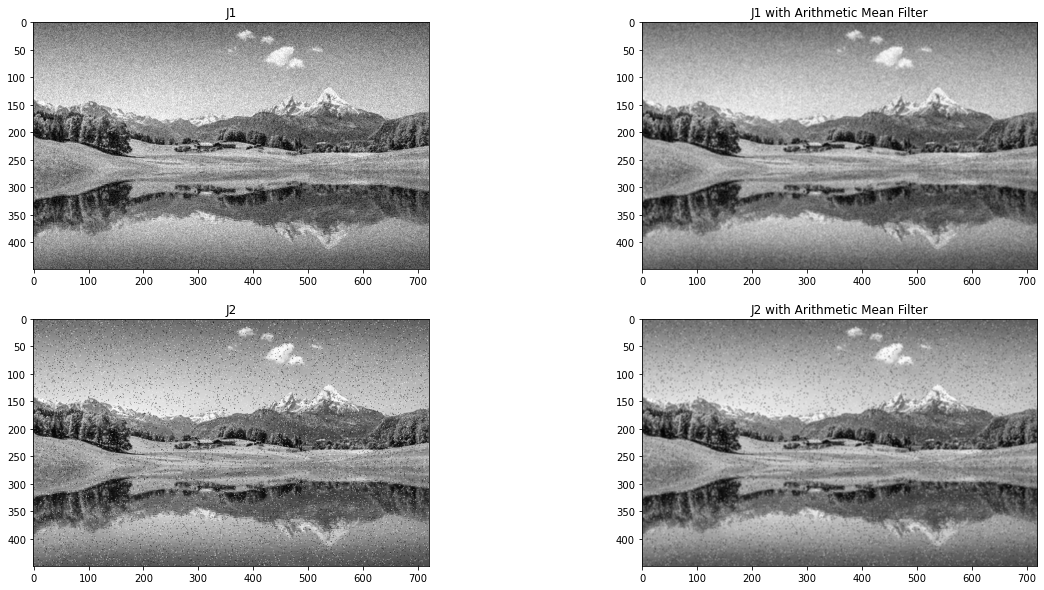

In [8]:
# Arithmetic Mean Filter
fig = plt.figure(figsize=(20,10), frameon=False)
ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223)  
ax4 = fig.add_subplot(224) 
j1_mean = rank.mean(img_as_ubyte(j1), footprint=np.ones((3,3)))/255
j2_mean = rank.mean(img_as_ubyte(j2), footprint=np.ones((3,3)))/255

ax1.imshow(j1,cmap='gray')
ax2.imshow(j1_mean, cmap='gray')
ax3.imshow(j2,cmap='gray')
ax4.imshow(j2_mean, cmap='gray')

ax1.title.set_text('J1')
ax2.title.set_text('J1 with Arithmetic Mean Filter')
ax3.title.set_text('J2')
ax4.title.set_text('J2 with Arithmetic Mean Filter')

plt.show()

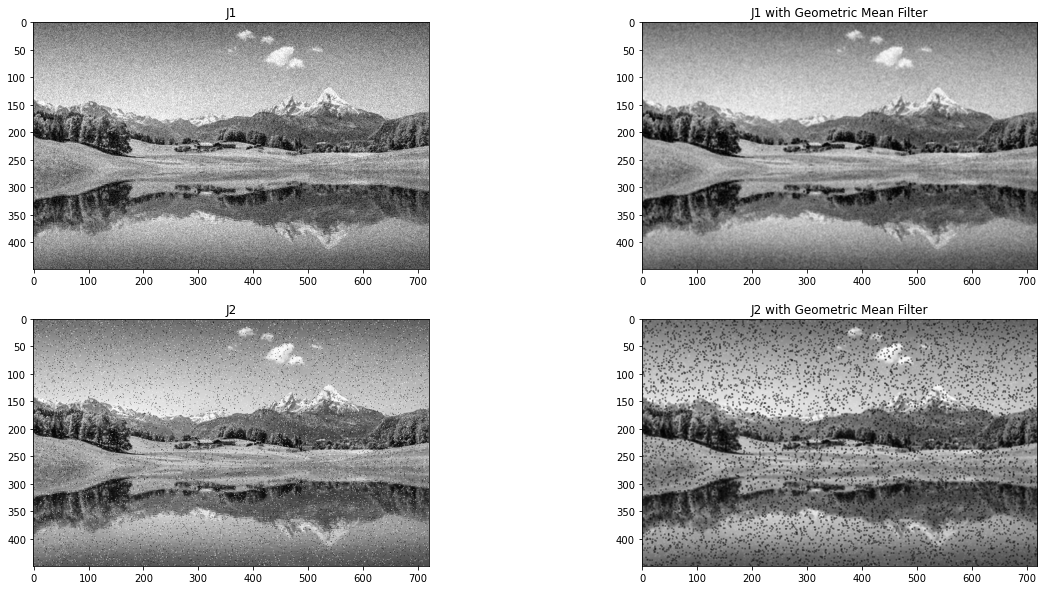

In [9]:
# Geometric Mean Filter
fig = plt.figure(figsize=(20,10), frameon=False)
ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223)  
ax4 = fig.add_subplot(224) 
j1_geomean = rank.geometric_mean(img_as_ubyte(j1), footprint=np.ones((3,3)))/255
j2_geomean = rank.geometric_mean(img_as_ubyte(j2), footprint=np.ones((3,3)))/255

ax1.imshow(j1,cmap='gray')
ax2.imshow(j1_geomean, cmap='gray')
ax3.imshow(j2,cmap='gray')
ax4.imshow(j2_geomean, cmap='gray')

ax1.title.set_text('J1')
ax2.title.set_text('J1 with Geometric Mean Filter')
ax3.title.set_text('J2')
ax4.title.set_text('J2 with Geometric Mean Filter')

plt.show()

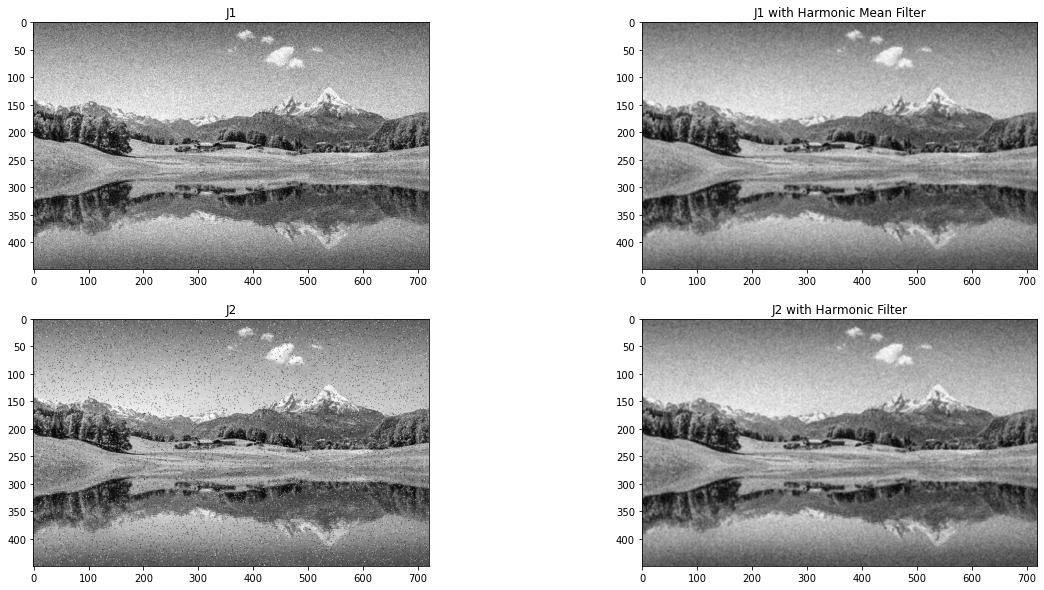

In [10]:
# Harmonic Mean Filter
fig = plt.figure(figsize=(20,10), frameon=False)
ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223)  
ax4 = fig.add_subplot(224) 
j1_harm = generic_filter(j1+1, function = harmonic_mean, size=(3,3))-1
j2_harm = generic_filter(j2+1, function = harmonic_mean, size=(3,3))-1

ax1.imshow(j1,cmap='gray')
ax2.imshow(j1_harm, cmap='gray')
ax3.imshow(j2,cmap='gray')
ax4.imshow(j1_harm, cmap='gray')

ax1.title.set_text('J1')
ax2.title.set_text('J1 with Harmonic Mean Filter')
ax3.title.set_text('J2')
ax4.title.set_text('J2 with Harmonic Filter')

plt.show()


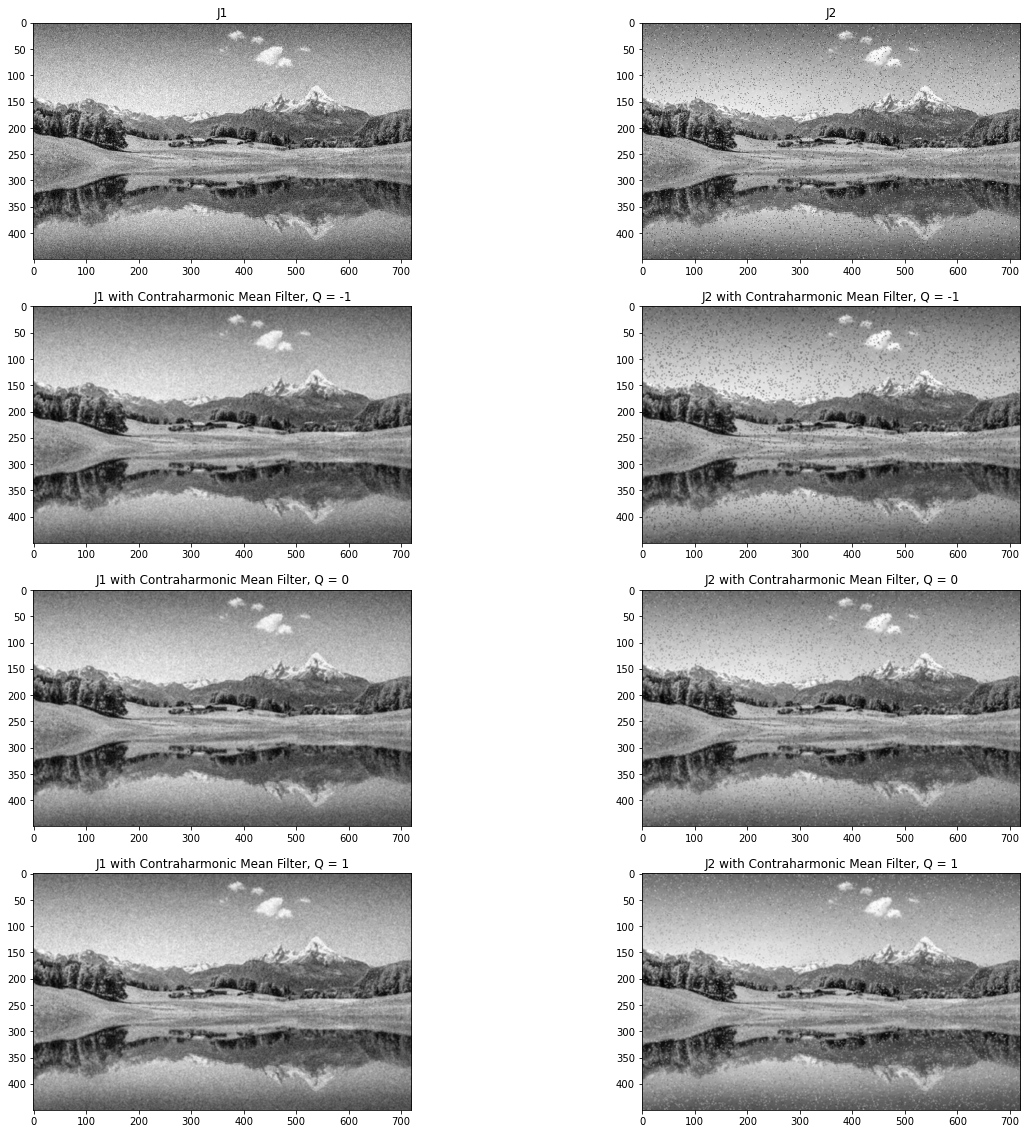

In [11]:
# Contraharmonic Mean Filter
def contraharmonic_mean(img, size, Q):
#     https://stackabuse.com/introduction-to-image-processing-in-python-with-opencv/
    num = np.power(img, Q + 1)
    denom = np.power(img, Q)
    kernel = np.full(size, 1.0)
    result = cv2.filter2D(num, -1, kernel) / cv2.filter2D(denom, -1, kernel)
    return result

fig = plt.figure(figsize=(20,20), frameon=False)
ax1 = fig.add_subplot(421)  
ax2 = fig.add_subplot(422)  
ax3 = fig.add_subplot(423)  
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(425)  
ax6 = fig.add_subplot(426)  
ax7 = fig.add_subplot(427)  
ax8 = fig.add_subplot(428) 

j1_contra_neg = contraharmonic_mean(j1+1, (3,3), -1)-1
j2_contra_neg = contraharmonic_mean(j2+1, (3,3), -1)-1
j1_contra_zero = contraharmonic_mean(j1+1, (3,3), 0)-1
j2_contra_zero = contraharmonic_mean(j2+1, (3,3), 0)-1
j1_contra_pos = contraharmonic_mean(j1+1, (3,3), 1)-1
j2_contra_pos = contraharmonic_mean(j2+1, (3,3), 1)-1

ax1.imshow(j1,cmap='gray')
ax2.imshow(j2,cmap='gray')
ax3.imshow(j1_contra_neg, cmap='gray')
ax4.imshow(j2_contra_neg, cmap='gray')
ax5.imshow(j1_contra_zero, cmap='gray')
ax6.imshow(j2_contra_zero, cmap='gray')
ax7.imshow(j1_contra_pos, cmap='gray')
ax8.imshow(j2_contra_pos, cmap='gray')

ax1.title.set_text('J1')
ax2.title.set_text('J2')
ax3.title.set_text('J1 with Contraharmonic Mean Filter, Q = -1')
ax4.title.set_text('J2 with Contraharmonic Mean Filter, Q = -1')
ax5.title.set_text('J1 with Contraharmonic Mean Filter, Q = 0')
ax6.title.set_text('J2 with Contraharmonic Mean Filter, Q = 0')
ax7.title.set_text('J1 with Contraharmonic Mean Filter, Q = 1')
ax8.title.set_text('J2 with Contraharmonic Mean Filter, Q = 1')
plt.show()

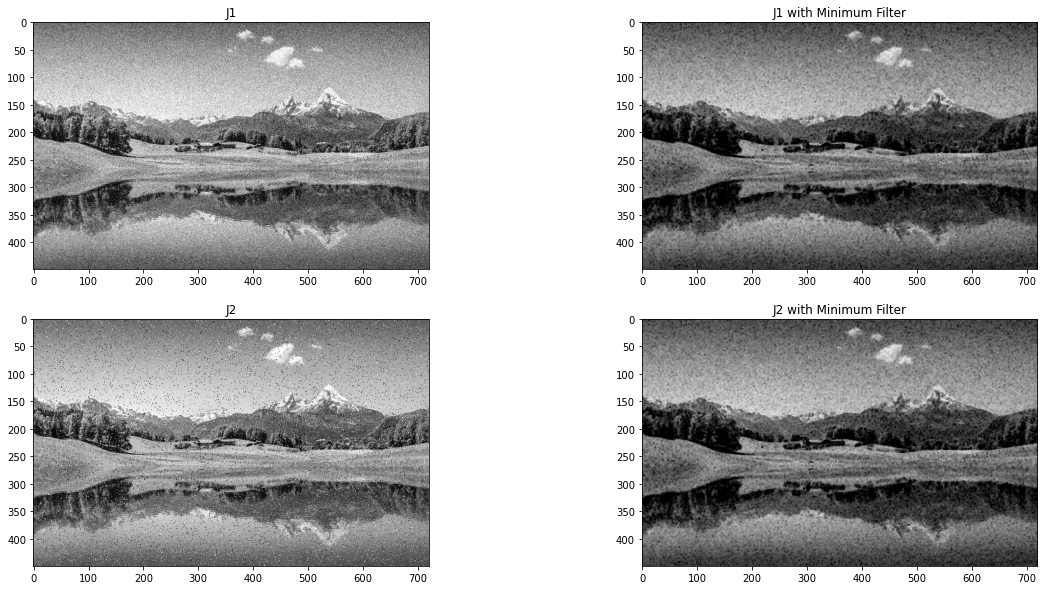

In [12]:
# Minimum Filter
fig = plt.figure(figsize=(20,10), frameon=False)
ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223)  
ax4 = fig.add_subplot(224) 
j1_min = minimum_filter(j1, size=(3,3))
j2_min = minimum_filter(j2, size=(3,3))

ax1.imshow(j1,cmap='gray')
ax2.imshow(j1_min, cmap='gray')
ax3.imshow(j2,cmap='gray')
ax4.imshow(j1_min, cmap='gray')

ax1.title.set_text('J1')
ax2.title.set_text('J1 with Minimum Filter')
ax3.title.set_text('J2')
ax4.title.set_text('J2 with Minimum Filter')

plt.show()

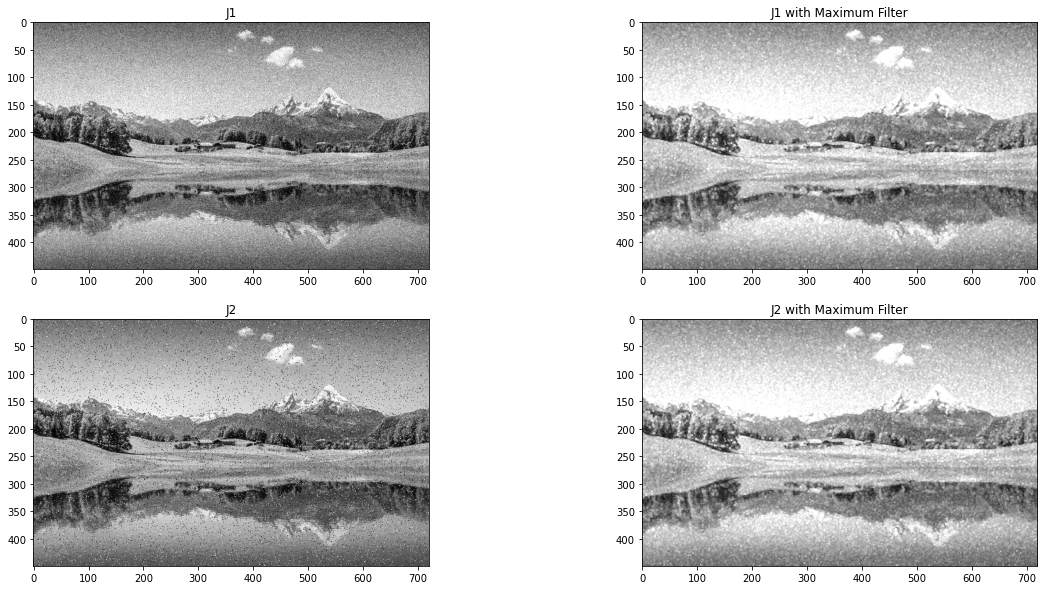

In [13]:
# Maximum Filter
fig = plt.figure(figsize=(20,10), frameon=False)
ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223)  
ax4 = fig.add_subplot(224) 
j1_max = maximum_filter(j1, size=(3,3))
j2_max = maximum_filter(j2, size=(3,3))

ax1.imshow(j1,cmap='gray')
ax2.imshow(j1_max, cmap='gray')
ax3.imshow(j2,cmap='gray')
ax4.imshow(j1_max, cmap='gray')

ax1.title.set_text('J1')
ax2.title.set_text('J1 with Maximum Filter')
ax3.title.set_text('J2')
ax4.title.set_text('J2 with Maximum Filter')

plt.show()

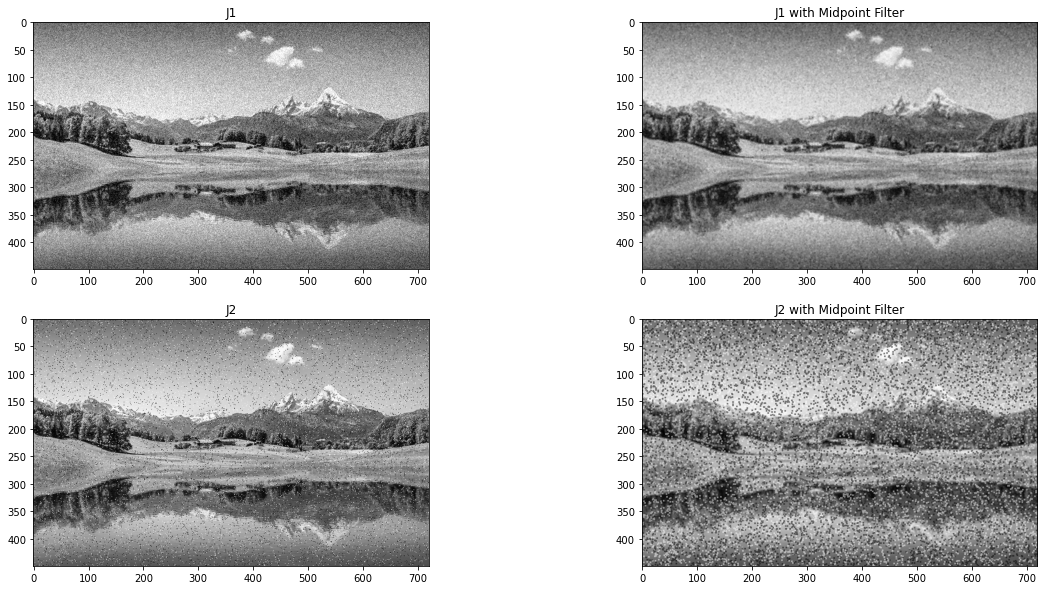

In [14]:
# Midpoint Filter
fig = plt.figure(figsize=(20,10), frameon=False)
ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223)  
ax4 = fig.add_subplot(224) 
j1_mid = 0.5*(j1_min + j1_max)
j2_mid = 0.5*(j2_min + j2_max)

ax1.imshow(j1,cmap='gray')
ax2.imshow(j1_mid, cmap='gray')
ax3.imshow(j2,cmap='gray')
ax4.imshow(j2_mid, cmap='gray')

ax1.title.set_text('J1')
ax2.title.set_text('J1 with Midpoint Filter')
ax3.title.set_text('J2')
ax4.title.set_text('J2 with Midpoint Filter')

plt.show()

**c) What denoising technique do you recommend for removing Gaussian noise? What denoising technique do you recommend for removing salt-and-pepper noise?**

In [15]:
# Calculate MSE to determine the one that's closest to img_gray

filter_name = ['Gaussian Filter', 'Median Filter', 'Arithmetic Mean Filter', \
               'Geometric Mean Filter', 'Harmonic Mean Filter', 'Contraharmonic Mean Filter, Q=-1', \
               'Contraharmonic Mean Filter, Q=0','Contraharmonic Mean Filter, Q=1','Minimum Filter', \
               'Maximum Filter', 'Midpoint Filter']
j1_imgs = [j1_gauss, j1_median, j1_mean, \
           j1_geomean, j1_harm, j1_contra_neg, \
           j1_contra_zero, j1_contra_pos, j1_min, j1_max, j1_mid]
j2_imgs = [j2_gauss, j2_median, j2_mean, \
           j2_geomean, j2_harm, j2_contra_neg, \
           j2_contra_zero, j2_contra_pos, j2_min, j2_max, j2_mid]

j1_res = []
j2_res = []

for i in range(len(filter_name)):
    j1_mse = mean_squared_error(img_gray, j1_imgs[i])
    j1_res.append(j1_mse)
    
    j2_mse = mean_squared_error(img_gray, j2_imgs[i])
    j2_res.append(j2_mse)

In [16]:
min_j1_mse = np.argmin(j1_res)
print("Recommended filter for J1 is " + filter_name[min_j1_mse] + " with MSE = " + str(j1_res[min_j1_mse]))

Recommended filter for J1 is Contraharmonic Mean Filter, Q=0 with MSE = 0.002723963047815422


In [17]:
min_j2_mse = np.argmin(j2_res)
print("Recommended filter for J2 is " + filter_name[min_j2_mse] + " with MSE = " + str(j2_res[min_j2_mse]))

Recommended filter for J2 is Median Filter with MSE = 0.0015323370151385986
